In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14,8


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

jtd = pd.read_csv(r'/content/drive/My Drive/colab/JTD.csv')
inv= pd.read_csv(r'/content/drive/My Drive/colab/Final_invoice.csv')
cust = pd.ExcelFile(r'/content/drive/My Drive/colab/customer.xlsx').parse('Sheet1')

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
print('JTD shape',jtd.shape)
print('INV shape',inv.shape)
print('cust shape',cust.shape)

JTD shape (5619484, 10)
INV shape (492314, 59)
cust shape (555338, 9)


In [0]:
df1 = inv.drop(['Unnamed: 0'],axis=1)

In [0]:
df2 = jtd.drop(['Unnamed: 0'],axis=1)

In [0]:
cust['Customer No.'] = cust['Customer No.'].str.strip()
df1['Customer No.'] = df1['Customer No.'].str.strip()

In [0]:
df = pd.merge(df1,cust, on='Customer No.',how='left')

In [10]:
df.shape

(492314, 66)

In [0]:
#df = pd.merge(res1,df2,how='left',left_on='Job Card No',right_on='DBM Order')

In [0]:
#df.drop(['Job Card No'],axis=1,inplace=True)

In [0]:
df_null = df.isnull().sum()/df.shape[0] * 100

In [0]:
drop_cols = df_null.index[df_null.values > 90].tolist()

In [0]:
df_new = df.drop(drop_cols,axis=1)

In [16]:
df_new.shape

(492314, 51)

In [17]:
df_new.isnull().sum()/df_new.shape[0] * 100

Amt Rcvd From Custom    40.073205
Amt Rcvd From Ins Co    40.073205
Area / Locality          4.852594
CGST(14%)               40.073205
CGST(2.5%)              40.073205
CGST(6%)                40.073205
CGST(9%)                40.073205
CITY                     0.000203
Cust Type                0.000000
Customer No.             0.000000
District                 0.000000
Gate Pass Time           0.000000
IGST(12%)               40.073205
IGST(18%)               40.073205
IGST(28%)               40.073205
IGST(5%)                40.073205
Invoice Date             0.000000
Invoice No               0.000000
Invoice Time             0.000000
Job Card No              0.000000
JobCard Date             0.000000
JobCard Time             0.000000
KMs Reading              0.000000
Labour Total             0.000000
Make                     0.000000
Misc Total               0.000000
Model                    0.309762
ODN No.                 40.073205
OSL Total                0.000000
Order Type    

# Areas with most cars

In [0]:
df_city = df_new.groupby(['CITY'])['Regn No'].nunique()

In [0]:
area_mostcars = df_city.sort_values(ascending=False).head(10)

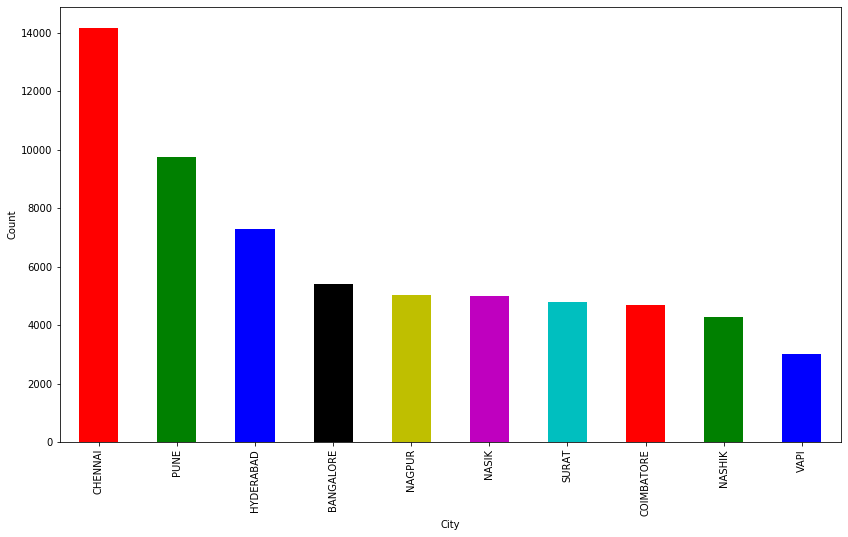

In [20]:
area_mostcars.plot(kind="bar",color= list('rgbkymc'))
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Popular Car Brands

In [0]:
df_carbrand = df_new.groupby(['Make'])['Regn No'].nunique().sort_values(ascending=False)

In [0]:
popular_carbrand = df_carbrand.head(10)

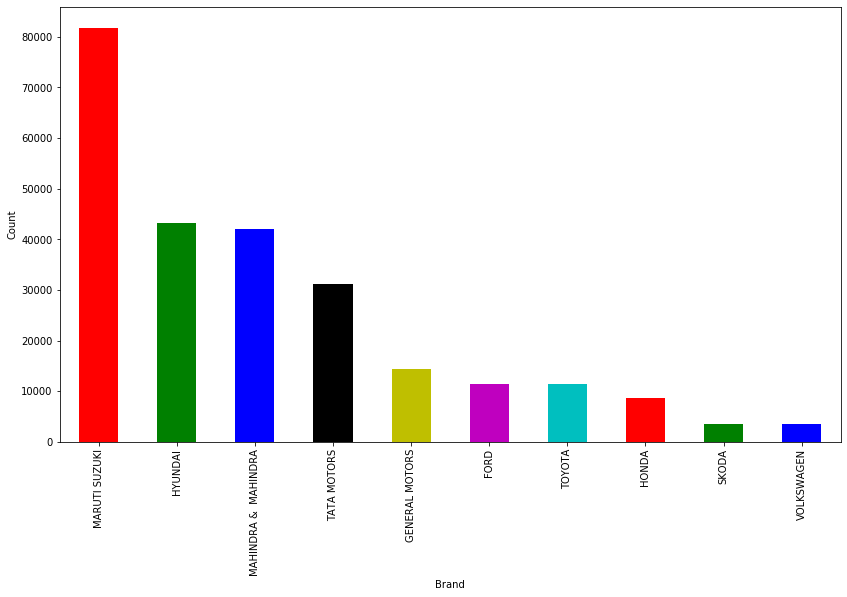

In [23]:
popular_carbrand.plot(kind="bar",color= list('rgbkymc'))
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Popular Service Type

In [24]:
service_type = df_new['Order Type'].value_counts().sort_values(ascending=False)
service_type

Running Repairs      269455
Paid Service         135004
Accidental            44159
SMC Redemption        15738
Mechanical            15100
SMC Value Package      9781
Repeat Order           3043
WBW Order                17
Workshop Damage          17
Name: Order Type, dtype: int64

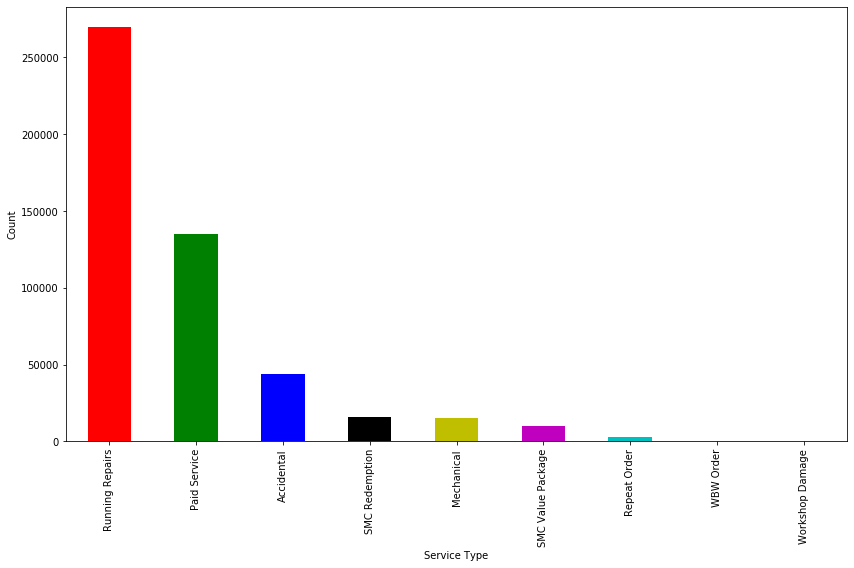

In [25]:
service_type.plot(kind="bar",color= list('rgbkymc'))
plt.xlabel('Service Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Services popular with different brand of cars

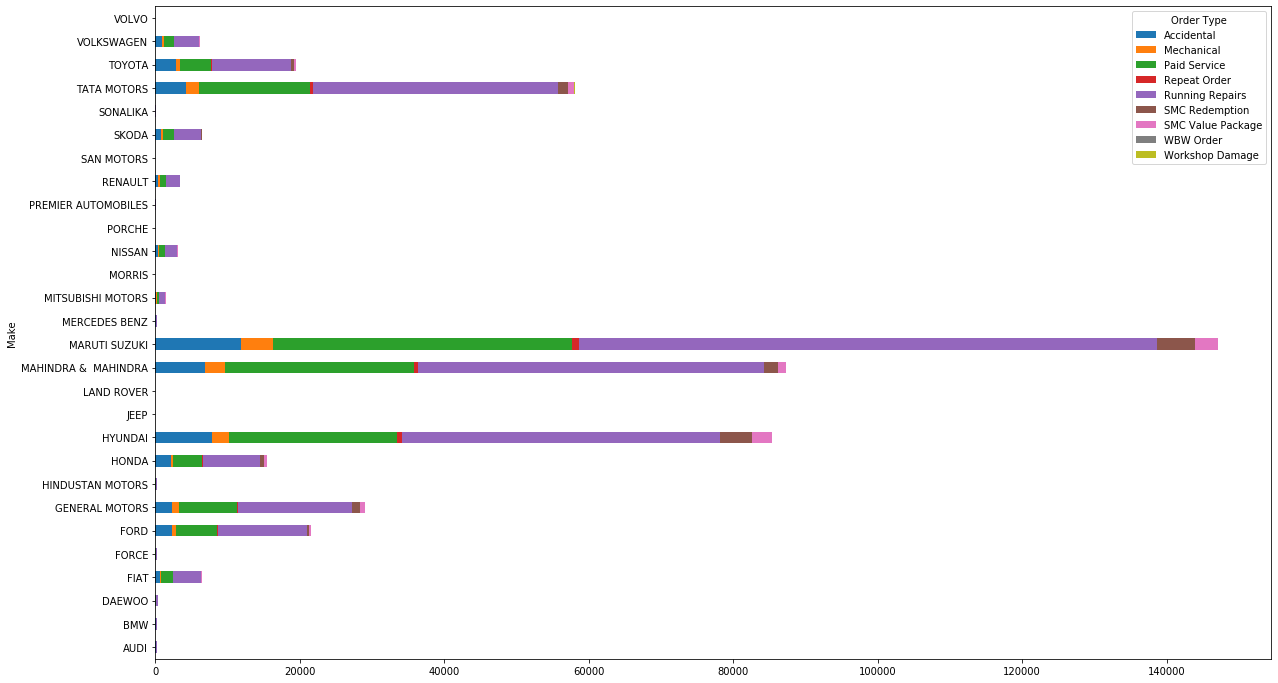

In [26]:
res = df_new.groupby(['Make', 'Order Type']).size().sort_values(ascending=False).unstack()
res.plot(kind='barh', stacked=True, figsize=(20,12))
plt.show()

# Average cost of each service

In [0]:
service_cost = df_new.groupby(['Order Type'])['Total Amt Wtd Tax.'].mean().sort_values(ascending=False)

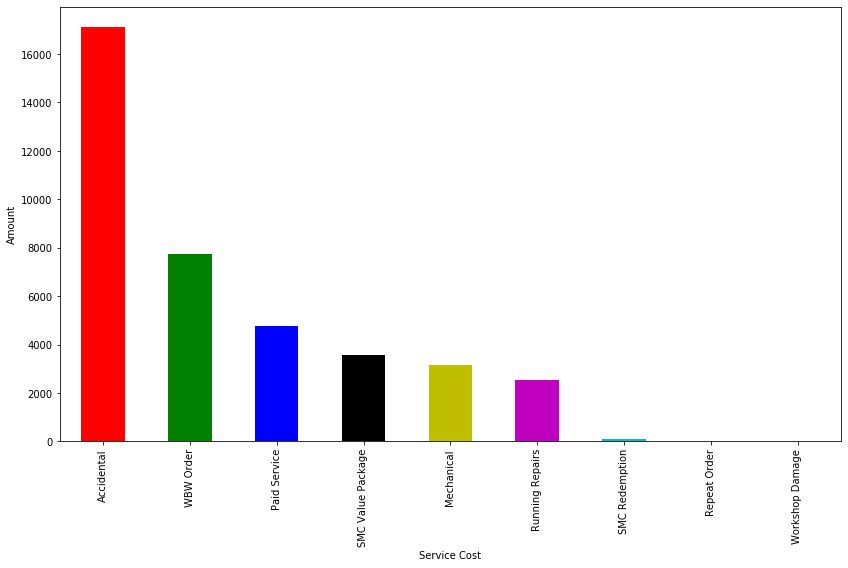

In [28]:
service_cost.plot(kind="bar",color= list('rgbkymc'))
plt.xlabel('Service Cost')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.show()

# Seasonality of different Services

In [0]:
df_new['Invoice Date'] = pd.to_datetime(df_new['Invoice Date'])
df_daily = df_new[['Invoice Date','Order Type']]

In [0]:
df_daily_ps = df_daily[df_daily['Order Type']=='Paid Service']
df_daily_rr = df_daily[df_daily['Order Type']=='Running Repairs']
df_daily_a = df_daily[df_daily['Order Type']=='Accidental']
df_daily_svp = df_daily[df_daily['Order Type']=='SMC Value Package']
df_daily_m = df_daily[df_daily['Order Type']=='Mechanical']
df_daily_sr = df_daily[df_daily['Order Type']=='SMC Redemption']
ps_daily = df_daily_ps.groupby(['Invoice Date'])['Order Type'].size()
rr_daily = df_daily_rr.groupby(['Invoice Date'])['Order Type'].size()
a_daily = df_daily_a.groupby(['Invoice Date'])['Order Type'].size()
svp_daily = df_daily_svp.groupby(['Invoice Date'])['Order Type'].size()
m_daily = df_daily_m.groupby(['Invoice Date'])['Order Type'].size()
sr_daily = df_daily_sr.groupby(['Invoice Date'])['Order Type'].size()

In [0]:
ps_monthly = ps_daily.resample('MS').sum()
rr_monthly = rr_daily.resample('MS').sum()
a_monthly = a_daily.resample('MS').sum()
svp_monthly = svp_daily.resample('MS').sum()
m_monthly = m_daily.resample('4W').sum()
sr_monthly = sr_daily.resample('MS').sum()

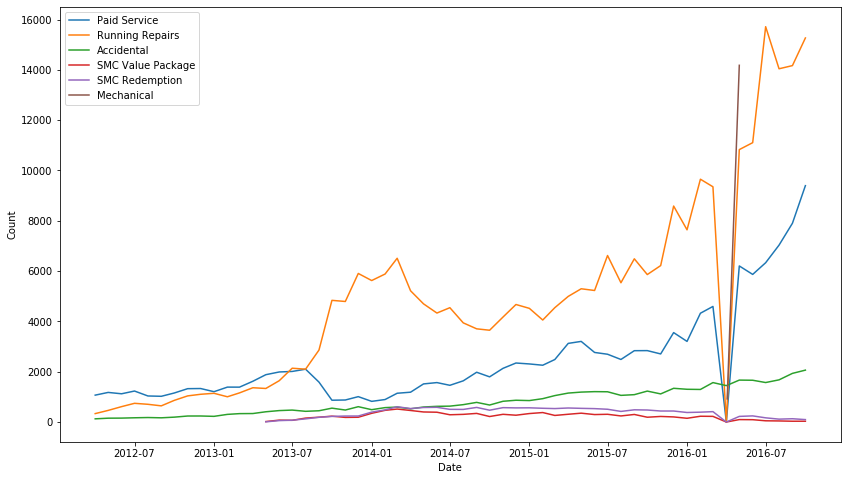

In [32]:
#service_list = ['Paid Service','Running Repairs','Accidental','SMC Value Package','Mechanical','SMC Redemption']
plt.plot(ps_monthly,label = 'Paid Service')
plt.plot(rr_monthly,label = 'Running Repairs')
plt.plot(a_monthly,label = 'Accidental')
plt.plot(svp_monthly,label = 'SMC Value Package')
plt.plot(sr_monthly,label = 'SMC Redemption')
plt.plot(m_monthly,label = 'Mechanical')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

## Customer Segmentation using RFM




In [0]:
#Recency
df_recency = df_new.groupby('Customer No.')['Invoice Date'].max().reset_index()
df_recency.columns = ['CustomerID','MaxPurchaseDate']
df_recency['Recency'] = (df_recency['MaxPurchaseDate'].max() - df_recency['MaxPurchaseDate']).dt.days

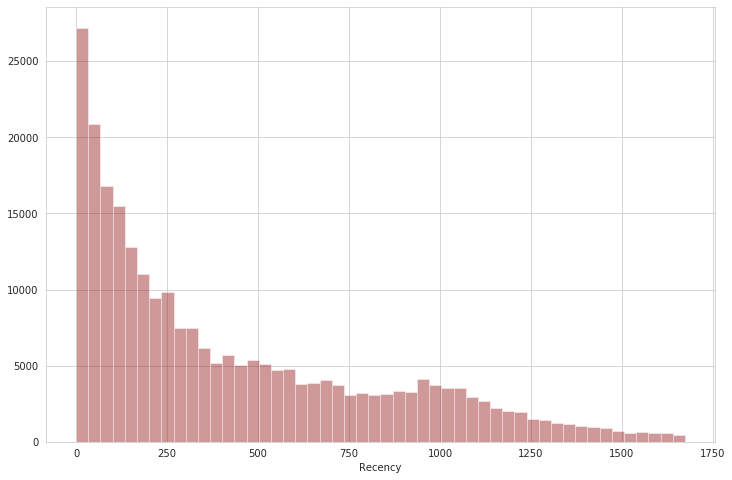

In [34]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.distplot(df_recency['Recency'],kde=False,color='darkred')
plt.show()

In [35]:
df_recency['Recency'].describe()

count    253484.000000
mean        427.899035
std         401.075875
min           0.000000
25%          97.000000
50%         281.000000
75%         684.000000
max        1673.000000
Name: Recency, dtype: float64

In [0]:
wcss = []
for k in range (1,10):
    km = KMeans(n_clusters=k,max_iter=1000, random_state=2)

    # Initialize KMeans algorithm
    km.fit(df_recency[['Recency']])
    # Fit on data
    wcss.append(km.inertia_)

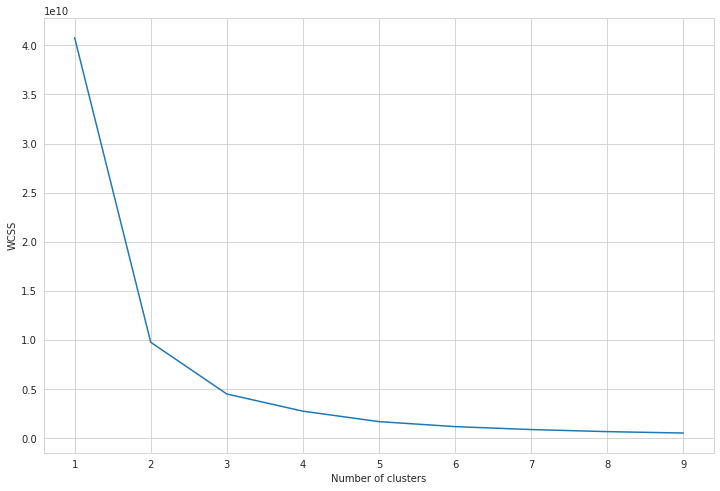

In [37]:
plt.figure(figsize=(12,8))
plt.plot(range(1,10),wcss)
# Setting X-axis label
plt.xlabel('Number of clusters')
# Setting Y-axis label
plt.ylabel('WCSS')
# Line plot # clusters on X-axis and WCSS on Y-axis 
plt.show()

In [0]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_x = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_x = df_x.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_x['index'] = df_x.index
    df_final = pd.merge(df,df_x[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [0]:
pd.options.display.float_format = '{:.2f}'.format

In [0]:
kmeans = KMeans(n_clusters=4,random_state=2)
kmeans.fit(df_recency[['Recency']])
df_recency['RecencyCluster'] = kmeans.predict(df_recency[['Recency']])

In [0]:
df_recency = order_cluster('RecencyCluster', 'Recency',df_recency,False)

In [81]:
df_recency.groupby('RecencyCluster').describe()

Recency                                                 \
                   count    mean    std     min     25%     50%     75%   
RecencyCluster                                                            
0               21947.00 1292.43 155.51 1089.00 1161.00 1256.00 1402.00   
1               42716.00  881.86 121.01  674.00  774.00  888.00  985.00   
2               60448.00  462.05 111.12  289.00  363.00  458.00  555.00   
3              128373.00  112.96  82.00    0.00   40.00   99.00  177.00   

                        
                   max  
RecencyCluster          
0              1673.00  
1              1088.00  
2               673.00  
3               288.00

In [0]:
#Frequency
df_freq = df_new.groupby('Customer No.')['Invoice No'].count().reset_index()
df_freq.columns = ['CustomerID','Frequency']

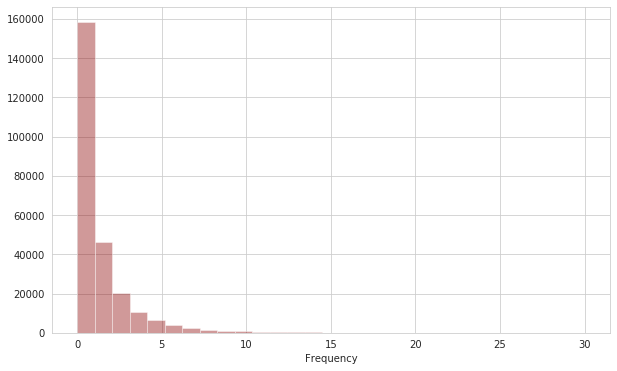

In [83]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.distplot(df_freq['Frequency'],kde=False,color='darkred',bins=np.linspace(0, 30, 30))
plt.show()

In [0]:
kmeans = KMeans(n_clusters=4,random_state=2)
kmeans.fit(df_freq[['Frequency']])
df_freq['FrequencyCluster'] = kmeans.predict(df_freq[['Frequency']])

In [0]:
df_freq = order_cluster('FrequencyCluster', 'Frequency',df_freq,True)

In [86]:
df_freq.groupby('FrequencyCluster').describe()

Frequency                                                 \
                     count    mean    std     min     25%     50%     75%   
FrequencyCluster                                                            
0                235560.00    1.50   0.83    1.00    1.00    1.00    2.00   
1                 17916.00    7.38   4.76    5.00    5.00    6.00    8.00   
2                     7.00  429.57 161.59  251.00  328.50  360.00  525.50   
3                     1.00 2668.00    nan 2668.00 2668.00 2668.00 2668.00   

                          
                     max  
FrequencyCluster          
0                   4.00  
1                 157.00  
2                 688.00  
3                2668.00

In [0]:
#Monetary Value
df_rev = df_new.groupby('Customer No.')['Total Amt Wtd Tax.'].sum().reset_index()
df_rev.columns = ['CustomerID','Revenue']

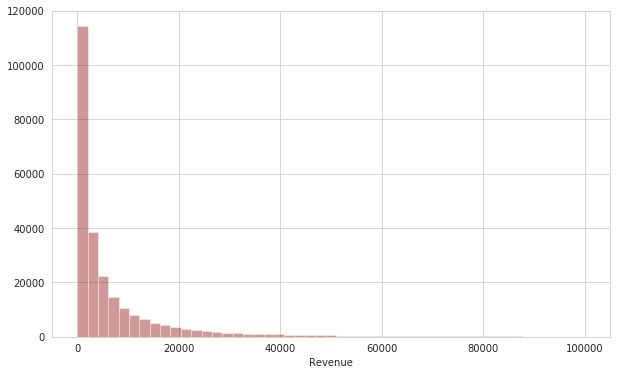

In [88]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.distplot(df_rev['Revenue'],kde=False,color='darkred',bins=np.linspace(0, 100000, 50))
plt.show()

In [0]:
kmeans = KMeans(n_clusters=4,random_state=2)
kmeans.fit(df_rev[['Revenue']])
df_rev['RevenueCluster'] = kmeans.predict(df_rev[['Revenue']])

In [0]:
df_rev = order_cluster('RevenueCluster', 'Revenue',df_rev,True)

In [91]:
df_rev.groupby('RevenueCluster').describe()

Revenue                                                \
                   count        mean       std         min         25%   
RevenueCluster                                                           
0              246178.00     5907.98   8603.39       -0.01      478.30   
1                7285.00    91826.61  58932.78    48854.56    57697.91   
2                  20.00  1424063.18 731390.92   854562.73   918410.61   
3                   1.00 11859728.34       nan 11859728.34 11859728.34   

                                                    
                       50%         75%         max  
RevenueCluster                                      
0                  2415.43     7338.82    48842.99  
1                 71642.31   101114.97   657705.63  
2               1097349.18  1655018.16  3801248.91  
3              11859728.34 11859728.34 11859728.34

In [0]:
merge = pd.merge(df_recency,df_freq, on='CustomerID')

In [0]:
cust_seg = pd.merge(merge,df_rev, on='CustomerID')

In [0]:
cust_seg['RFMScore'] = cust_seg['RevenueCluster'] + cust_seg['FrequencyCluster'] + cust_seg['RecencyCluster']

In [95]:
cust_seg.groupby('RFMScore')['Recency','Frequency','Revenue'].mean()

,Recency,Frequency,Revenue
RFMScore,,,
0,1293.61,1.36,4944.36
1,891.26,1.58,5772.42
2,482.76,1.71,6979.32
3,130.87,1.72,6523.69
4,142.47,6.18,39242.23
5,114.59,10.84,97386.96
6,62.45,102.82,1208959.28
7,91.00,445.67,1874072.07
9,48.00,2668.00,11859728.34


In [0]:
cust_seg['Segment'] = 'Low_Value'
cust_seg.loc[cust_seg['RFMScore']>3,'Segment'] = 'Mid-Value' 
cust_seg.loc[cust_seg['RFMScore']>5,'Segment'] = 'High-Value' 

In [97]:
cust_seg.head()

,CustomerID,MaxPurchaseDate,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,RFMScore,Segment
0,1,2013-03-30,1311,0,4,0,0.00,0,0,Low_Value
1,10,2013-06-17,1232,0,5,1,11105.56,0,1,Low_Value
2,100,2012-09-12,1510,0,2,0,20799.74,0,0,Low_Value
3,10002,2013-02-10,1359,0,1,0,1828.56,0,0,Low_Value
4,10004,2013-02-10,1359,0,1,0,750.30,0,0,Low_Value


In [0]:
cust_seg_vis = cust_seg[['Recency','Frequency','Revenue','Segment']]

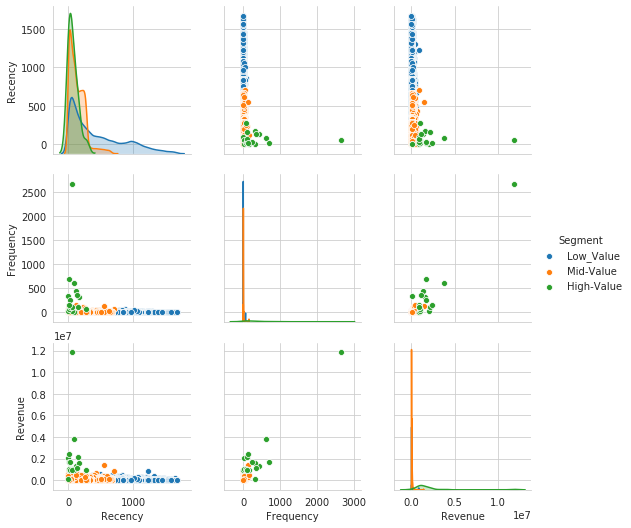

In [99]:
sns.pairplot(cust_seg_vis, hue='Segment')
plt.show()

In [100]:
cust_seg.head(5)

,CustomerID,MaxPurchaseDate,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,RFMScore,Segment
0,1,2013-03-30,1311,0,4,0,0.00,0,0,Low_Value
1,10,2013-06-17,1232,0,5,1,11105.56,0,1,Low_Value
2,100,2012-09-12,1510,0,2,0,20799.74,0,0,Low_Value
3,10002,2013-02-10,1359,0,1,0,1828.56,0,0,Low_Value
4,10004,2013-02-10,1359,0,1,0,750.30,0,0,Low_Value


In [0]:
revenue_mean = cust_seg.groupby('Segment')['Revenue'].mean()

In [102]:
revenue_mean

Segment
High-Value   2022372.93
Low_Value       6367.36
Mid-Value      47403.22
Name: Revenue, dtype: float64

In [0]:
#Assuming lifespan of a car to be 10 years below is CLV prediction of each segment'
total_period = (df_new['Invoice Date'].max() - df_new['Invoice Date'].min()).days
CLV = (revenue_mean/ total_period *3650).sort_values(ascending=False)

In [104]:
print(CLV)

Segment
High-Value   4412230.25
Mid-Value     103420.05
Low_Value      13891.74
Name: Revenue, dtype: float64
